# Exercice réseaux de neurone

## Enonce

Le but de cette exercice est de prédire si un élève est admis ou non en fonction des notes qu'il a reçu dans plusieurs matières. La règle d'admission d'un élève est la suivante : **L'élève est admis si et seulement si la moyenne de ses notes est supérieure à 10**.

## Librairies

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

## Data

In [24]:
#on génère un dataset, avec 2 features (1 note dans chacune des 2 matières mathématiques et français), et 1000 échantillons
n_features = 2
n_echantillons = 1000
seed = 42
coeffMatieres = np.array([1, 2])

rng = np.random.default_rng(seed)
X = np.ones(shape=(n_echantillons, n_features))
y = np.ones(shape=(n_echantillons,))
print(X.shape)
print(y.shape)


for i in range(n_echantillons):
    X[i,:] = np.round(rng.uniform(0,20, n_features),1)
    
    testEleveAdmi = X[i,:].dot(coeffMatieres) / np.sum(coeffMatieres)
    #print(X[i,:], testEleveAdmi)
    y[i] = testEleveAdmi > 10

print(X)
print(y)

(1000, 2)
(1000,)
[[15.5  8.8]
 [17.2 13.9]
 [ 1.9 19.5]
 ...
 [ 9.5 15.1]
 [ 5.7  6.7]
 [16.9 10.4]]
[1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 

In [25]:
#on divise le dataset en 2, 1 training set et 1 test set
#X_train, y_train = X[i,:]
pourcentDataInTrainingSet = round(0.20*n_echantillons)

X_train, y_train = X[:pourcentDataInTrainingSet], y[:pourcentDataInTrainingSet]
X_test, y_test = X[pourcentDataInTrainingSet:], y[pourcentDataInTrainingSet:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 2) (200,)
(800, 2) (800,)


## Représentation à l'aide d'un dataframe

In [26]:
#on représente les échantillons et les étiquettes dans un dataframe pour aider à la visualisation
df = pd.DataFrame({'Français': X[:,0], 'Mathématiques': X[:,1], 'Admission': y})
df

,Français,Mathématiques,Admission
0,15.5,8.8,1.0
1,17.2,13.9,1.0
2,1.9,19.5,1.0
3,15.2,15.7,1.0
4,2.6,9.0,0.0
...,...,...,...
995,1.8,13.5,0.0
996,6.8,1.4,0.0
997,9.5,15.1,1.0
998,5.7,6.7,0.0


## Representation graphique

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\18045259.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\18045259.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')


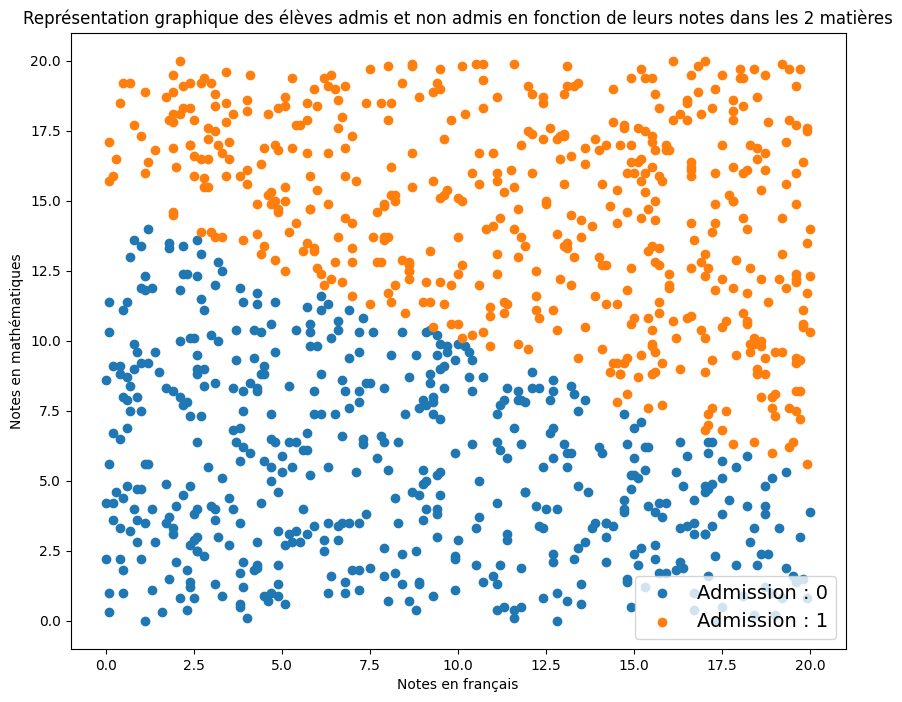

In [27]:
#on représente graphiquement les données, i.e les notes des élèves
plt.figure(figsize=(10,8))

plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')

plt.title("Représentation graphique des élèves admis et non admis en fonction de leurs notes dans les 2 matières")
plt.legend(fontsize=14)
plt.xlabel("Notes en français")
plt.ylabel("Notes en mathématiques")

plt.show()

## Classe réseau de neurones

In [28]:
class ReseauNeuronesArtificiel():
    def _init__(self, W, b):
        self.W = W
        self.b = b
        self.learning_rate = None
        self.X_train = None
        self.y_train = None
        self.cout = None
    
    def __model(self, X):
        Z=X.dot(self.W) + self.b
        A=1/(1+np.exp(-Z))
        return A
    
    def __initialisation(self, X, y, learning_rate):
        self.X_train = X
        self.y_train = y
        self.W=np.random.randn(self.X_train.shape[1],1)
        self.b=np.random.randn(1)
        self.learning_rate = learning_rate
        self.cout = []
    
    def __logLoss(self, A):
        return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))
    
    def __gradient(self, A):
        dW=1/len(self.y_train)*np.dot(self.X_train.T,A-self.y_train)
        db=1/len(self.y_train)*sum(A-self.y_train)
        return (dW,db)
    
    def __update(self,dW,db):
        self.W=self.W-self.learning_rate*dW
        self.b=self.b-self.learning_rate*db

    def fit(self, X,y, learning_rate=0.1, n_iter=10000):
        #initialisation
        self.__initialisation(X, y, learning_rate)
        
        for i in range(n_iter):
            A=self.__model(X,)
            self.cout.append(self.__logLoss(A))
            dW,db=self.__gradient(A)
            self.__update(dW,db)
        
        y_pred=self.predict(X)
        
        return y_pred
        
    def predict(self, X_predict):
        A=self.__model(X_predict)
        #print(A)
        return A>=0.5

## Entraînement du modèle

0.98


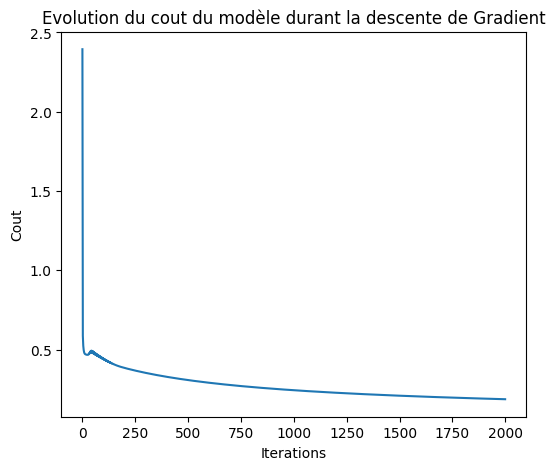

In [29]:
#on reshape la matrice y
y_train = y_train.reshape(y_train.shape[0], 1)
#print(y.shape)

#on crée un objet réseaux neurones, et on passe le training set précédent pour l'entrainer et pour obtenir les bon paramètres w et b
rn = ReseauNeuronesArtificiel()
y_train_pred = rn.fit(X_train, y_train, learning_rate=0.05, n_iter=2000)

#on affiche les performances de notre modèle
print(accuracy_score(y_train, y_train_pred))

#on représente graphiquement l'évolution du cout du modele
plt.figure(figsize=(6,5))

plt.plot(rn.cout)

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Iterations")
plt.ylabel("Cout")

plt.show()

## Test du modèle

In [30]:
#on teste maintenant le modèle avec le test set
y_test_pred = rn.predict(X_test)

#on affiche les performances de notre modèle
print(accuracy_score(y_test, y_test_pred))

0.955


## Représentation graphique du dataset et de la frontière de décision

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\1018343468.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\1018343468.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')


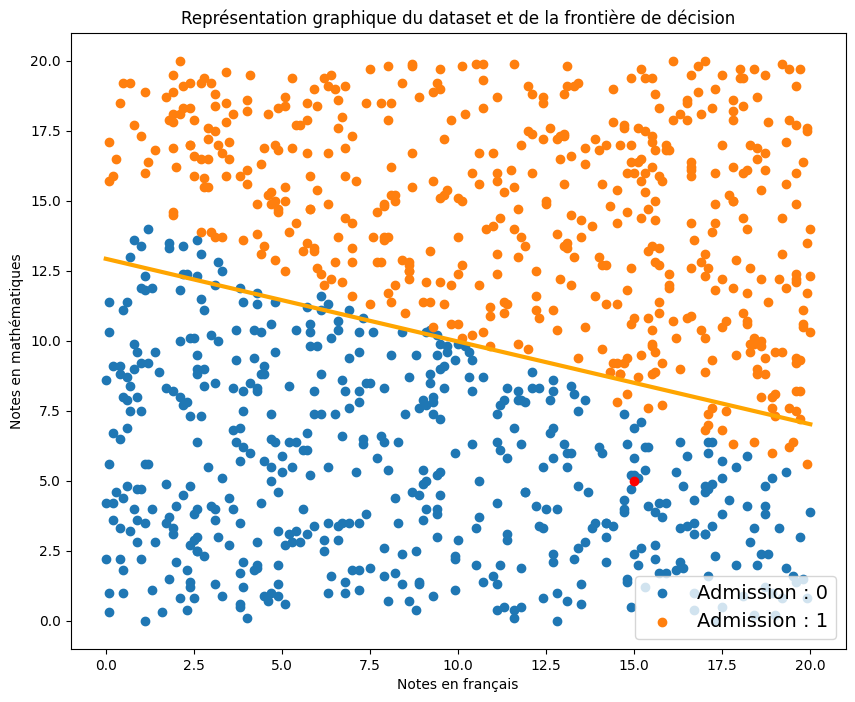

[False]


In [31]:
#on créé un nouvel élève avec 2 notes
nouvelEleve=np.array([15,5])

x0=np.linspace(0,20,50)
x1=(-rn.W[0]*x0-rn.b)/rn.W[1]

plt.figure(figsize=(10,8))

plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')
plt.plot(x0,x1,c='orange',lw=3)
plt.scatter(nouvelEleve[0], nouvelEleve[1],c='r')

plt.title("Représentation graphique du dataset et de la frontière de décision")
plt.legend(fontsize=14)
plt.xlabel("Notes en français")
plt.ylabel("Notes en mathématiques")

plt.show()

#on prédit la classe de l'élèe, i.e s'il est admis ou non
print(rn.predict(nouvelEleve))

## Dataset avec 3 features (= 3 notes)

In [32]:
n_features = 3
coeffMatieres = np.array([2, 1, 2])

rng = np.random.default_rng(seed)
X1 = np.ones(shape=(n_echantillons, n_features))
y1 = np.ones(shape=(n_echantillons,))
print(X1.shape)
print(y1.shape)


for i in range(n_echantillons):
    X1[i,:] = np.round(rng.uniform(0,20, n_features),1)
    
    testEleveAdmi = X1[i,:].dot(coeffMatieres) / np.sum(coeffMatieres)
    #print(X[i,:], testEleveAdmi)
    y1[i] = testEleveAdmi > 10

print(X1)
print(y1)

(1000, 3)
(1000,)
[[15.5  8.8 17.2]
 [13.9  1.9 19.5]
 [15.2 15.7  2.6]
 ...
 [16.4  6.2 11. ]
 [11.3  9.5 13.1]
 [ 4.2 19.6  2. ]]
[1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1

In [33]:
df1 = pd.DataFrame({'Mathématiques': X1[:,0], 'Histoire': X1[:,1], 'Physique': X1[:,2], 'Admission': y1})
df1

,Mathématiques,Histoire,Physique,Admission
0,15.5,8.8,17.2,1.0
1,13.9,1.9,19.5,1.0
2,15.2,15.7,2.6,1.0
3,9.0,7.4,18.5,1.0
4,12.9,16.5,8.9,1.0
...,...,...,...,...
995,4.8,1.2,11.0,0.0
996,3.2,12.2,15.8,1.0
997,16.4,6.2,11.0,1.0
998,11.3,9.5,13.1,1.0


In [34]:
#on split le dataset en 2
pourcentDataInTrainingSet = round(0.20*n_echantillons)

X1_train, y1_train = X1[:pourcentDataInTrainingSet], y1[:pourcentDataInTrainingSet]
X1_test, y1_test = X1[pourcentDataInTrainingSet:], y1[pourcentDataInTrainingSet:]

#on reshape la matrice y
y1_train_reshape, y1_test_reshape = y1_train.reshape(y1_train.shape[0], 1), y1_test.reshape(y1_test.shape[0], 1)

## Entrainement du modèle

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\3042325136.py:24: RuntimeWarning: divide by zero encountered in log
  return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\3042325136.py:24: RuntimeWarning: invalid value encountered in multiply
  return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))


0.975


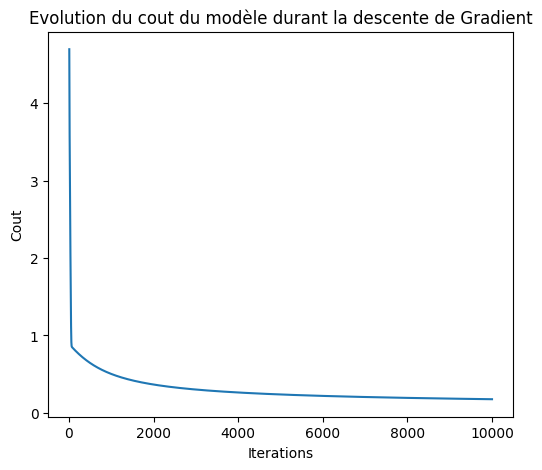

In [35]:
#on crée un objet réseaux neurones, et on passe le dataset précédent pour l'entrainer et pour obtenir les bon paramètres w et b
rn1 = ReseauNeuronesArtificiel()
y1_train_reshape_pred = rn1.fit(X1_train, y1_train_reshape, learning_rate=0.025, n_iter=10000)

#on affiche les performances de notre modèle
print(accuracy_score(y1_train_reshape, y1_train_reshape_pred))

#on représente graphiquement l'évolution du cout du modele
plt.figure(figsize=(6,5))

plt.plot(rn1.cout)

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Iterations")
plt.ylabel("Cout")

plt.show()

## Test du modèle

In [36]:
#on teste maintenant le modèle avec le test set
y1_test_pred = rn1.predict(X1_test)

#on affiche les performances de notre modèle
print(accuracy_score(y1_test, y1_test_pred))

0.975


## Représentation graphique du dataset et de la frontière de décision

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\4070155561.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X1[y1==0][:,0], X1[y1==0][:,1], X1[y1==0][:,2], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_13748\4070155561.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X1[y1==1][:,0], X1[y1==1][:,1], X1[y1==1][:,2], c="C"+str(1), label="Admission : " + str(1), cmap='winter')


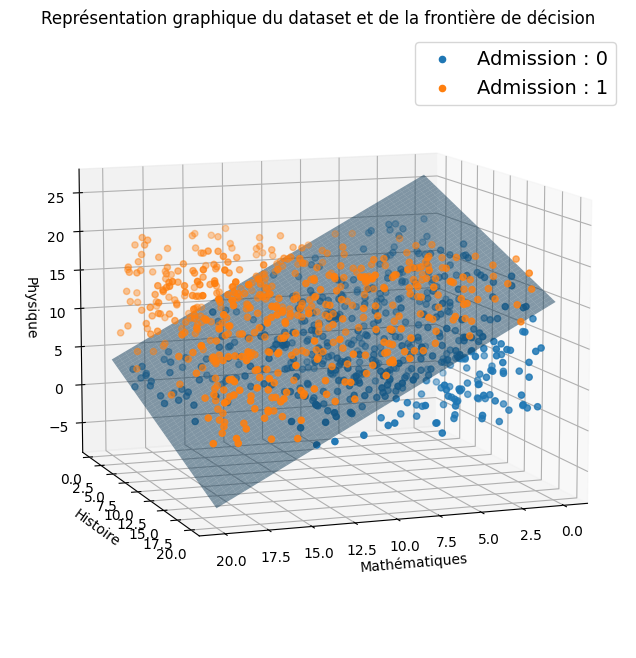

In [37]:
# Représentation graphique du modèle en 3d 
x0=np.linspace(0,20,50)
x1=np.linspace(0,20,50)
x0, x1 = np.meshgrid(x0, x1)
x2=-(rn1.W[0]*x0 + rn1.W[1]*x1 + rn1.b) / rn1.W[2]

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, x2, alpha=0.5)
ax.scatter(X1[y1==0][:,0], X1[y1==0][:,1], X1[y1==0][:,2], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
ax.scatter(X1[y1==1][:,0], X1[y1==1][:,1], X1[y1==1][:,2], c="C"+str(1), label="Admission : " + str(1), cmap='winter')

plt.title("Représentation graphique du dataset et de la frontière de décision")
plt.legend(fontsize=14)
ax.set_xlabel('Mathématiques')
ax.set_ylabel('Histoire')
ax.set_zlabel('Physique')

ax.view_init(10, 70)
plt.show()

## Data avec 5 notes

In [38]:
#on crée maintenant un dataset avec des élèves possédant 5 notes dans 5 matières différentes
n_features = 5
coeffMatieres = np.array([3, 2, 2, 3, 1])
n_echantillons = 2000
seed = 42

rng = np.random.default_rng(seed)
X2 = np.ones(shape=(n_echantillons, n_features))
y2 = np.ones(shape=(n_echantillons,))
print(X2.shape)
print(y2.shape)

for i in range(n_echantillons):
    X2[i,:] = np.round(rng.uniform(0,20, n_features),1)
    
    testEleveAdmi = X2[i,:].dot(coeffMatieres) / np.sum(coeffMatieres)
    #print(X[i,:], testEleveAdmi)
    y2[i] = testEleveAdmi >= 10

print(X2)
print(y2)

(2000, 5)
(2000,)
[[15.5  8.8 17.2 13.9  1.9]
 [19.5 15.2 15.7  2.6  9. ]
 [ 7.4 18.5 12.9 16.5  8.9]
 ...
 [19.2 16.6 16.3  6.8  6.7]
 [ 5.8  6.9  7.4  2.8  7.1]
 [ 8.9  6.2  3.3  7.5  9.6]]
[1. 1. 1. ... 1. 0. 0.]


In [39]:
df2 = pd.DataFrame({'Mathématiques': X2[:,0], 'Français': X2[:,1], 'Histoire': X2[:,2], 'Physique': X2[:,3], 'Sport': X2[:,4], 'Admission': y2})
df2

,Mathématiques,Français,Histoire,Physique,Sport,Admission
0,15.5,8.8,17.2,13.9,1.9,1.0
1,19.5,15.2,15.7,2.6,9.0,1.0
2,7.4,18.5,12.9,16.5,8.9,1.0
3,4.5,11.1,1.3,16.6,12.6,0.0
4,15.2,7.1,19.4,17.9,15.6,1.0
...,...,...,...,...,...,...
1995,2.2,14.2,16.8,2.1,2.5,0.0
1996,5.6,0.2,19.7,12.0,12.2,0.0
1997,19.2,16.6,16.3,6.8,6.7,1.0
1998,5.8,6.9,7.4,2.8,7.1,0.0


In [40]:
#on split le dataset en 2
pourcentDataInTrainingSet = round(0.20*n_echantillons)

X2_train, y2_train = X2[:pourcentDataInTrainingSet], y2[:pourcentDataInTrainingSet]
X2_test, y2_test = X2[pourcentDataInTrainingSet:], y2[pourcentDataInTrainingSet:]

#on reshape la matrice y
y2_train_reshape, y2_test_reshape = y2_train.reshape(y2_train.shape[0], 1), y2_test.reshape(y2_test.shape[0], 1)

## Entrainement du modèle

0.9925


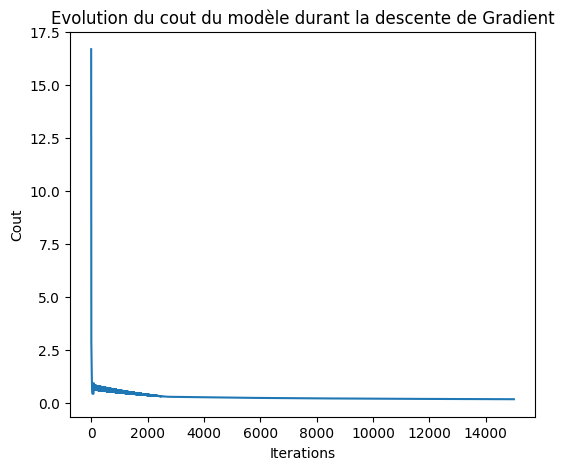

In [41]:
#on crée un objet réseaux neurones, et on passe le dataset précédent pour l'entrainer et pour obtenir les bon paramètres w et b
rn2 = ReseauNeuronesArtificiel()
y2_train_pred = rn2.fit(X2_train, y2_train_reshape, learning_rate=0.025, n_iter=15000)

#on affiche les performances de notre modèle
print(accuracy_score(y2_train, y2_train_pred))

#on représente graphiquement l'évolution du cout du modele
plt.figure(figsize=(6,5))

plt.plot(rn2.cout)

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Iterations")
plt.ylabel("Cout")

plt.show()

## Test du modèle

In [42]:
#on teste maintenant le modèle avec le test set
y2_test_pred = rn2.predict(X2_test)

#on affiche les performances de notre modèle
print(accuracy_score(y2_test, y2_test_pred))

0.98125


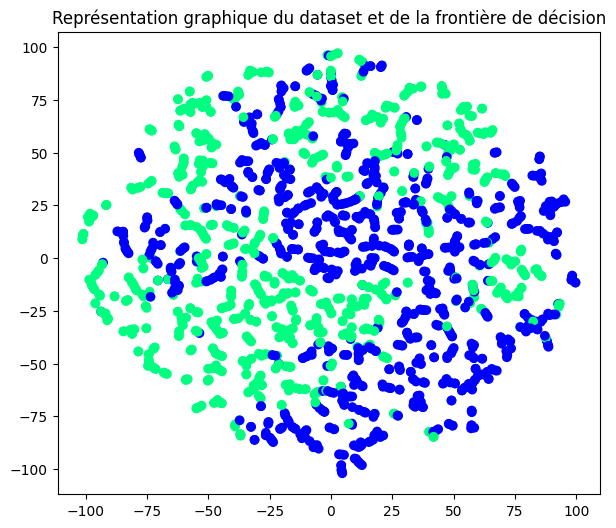

[14.4 14.2  4.1  0.7  6.1]
7.900000000000001
[False]


In [43]:
#on ne peut pas afficher le dataset graphiquement car il est en 5 dimensions, on utilise donc l'algo TSNE qui effectue une réduction de dimension pour visualiser le dataset
tsne_rn = TSNE(n_components=2, 
            learning_rate='auto', 
            init='random', 
            perplexity=3)

x2_tsne_rn = tsne_rn.fit_transform(X2)

plt.figure(figsize=(7,6))

plt.scatter(x2_tsne_rn[:,0], x2_tsne_rn[:,1], c=y2, cmap='winter')

plt.title("Représentation graphique du dataset et de la frontière de décision")
plt.show()

#on prédit la classe de l'élève, i.e s'il est admis ou non
nouvelEleveTsne = np.array([round(rng.uniform(0,20),1) for i in range(n_features)])
print(nouvelEleveTsne)
print(np.mean(nouvelEleveTsne))
print(rn2.predict(nouvelEleveTsne))

In [44]:
#on utilise le PCA pour analyser quels sont les features de notre dataset qui ont le plus d'importance
pca = PCA(n_components=n_features)
pca.fit(X2)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)



eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_features)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
print(eig)

5
[36.11443001 33.62727344 32.63510773 31.98915872 31.85052527]
[0.21727344 0.20231009 0.19634097 0.19245478 0.19162072]
  Dimension  Variance expliquée  % variance expliquée  % var. expliquée
0      Dim1           36.114430                  22.0              22.0
1      Dim2           33.627273                  20.0              42.0
2      Dim3           32.635108                  20.0              62.0
3      Dim4           31.989159                  19.0              81.0
4      Dim5           31.850525                  19.0             100.0
